<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/16_PandaVGG_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Our very own version of VGG implementation
# First let's check out how VGG looks like 
from keras.applications.vgg19 import VGG19
import numpy as np

model = VGG19()
model.summary()

574717952/574710816 [==============================] - 6s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [0]:
# Directory structure to follow for production training of model
# Objective: Lowest latency : Training is usually done in clusters -> data is distributed as well-> so keeping their names
# highly organized becomes very important to quickly reference them 
# Solution: keep data highly structured 
# Objective: Ease of bug detection
# Solution: follow hierarchy 
# Objective: Highly mobile code
# Solution: mention dependencies 


In [5]:
!ls

'16 cogni Directory for portable model training.PNG'   sample_data


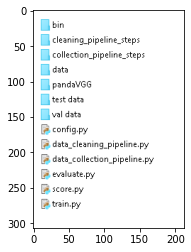

In [14]:
# Directory structure for pipeline
import cv2
x = cv2.imread('16 cogni Directory for portable model training.PNG')
import matplotlib.pyplot as plt
plt.imshow(x)

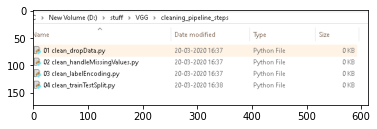

In [15]:
#inside a pipeline folder
import cv2
x = cv2.imread('16 cogni Directory for portable model training 1.PNG')
import matplotlib.pyplot as plt
plt.imshow(x)

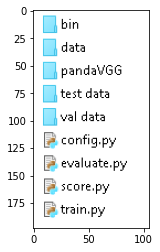

In [7]:
# Directory structure for standalone cleaning and training
import cv2
x = cv2.imread('16 cogni Directory for portable model training.PNG')
import matplotlib.pyplot as plt
plt.imshow(x)

#Directory Structure (Diagram above)

Config.py/ install.py : all installations, properties, constants, global variables, required for libraries used in program

example: !pip install tensorflow keras

example: import numpy as np

example: PI=3.1

example: system.globalvars.PATH = system.globalvars.PATH + 'some new dependency path' <example only>

train.py : actual program that uses 'MODEL class' and generates a 'MODEL object' as a result of training 

test.py : actual program that Scores the model after training

eval.py : Evaluates the model post training

data folder-> all our raw data (CSV, images, audio, text, URLs for HTTP written in excel or text files everything!)

This should be highly structured and hierarchial (more folders and more division, the better- more columns the better)

bin folder -> output of your activities- all your plots, the model.h5 or model.pickle, any other artifacts of training, cleaned data 

if cleaned data is too much -> created different folders inside data-> dirty and clean 

First keep data by default in dirty-> after transformations/manual cleaning/magic no. removal/outlier removal/ image augmentation/ encoding etc etc.. move to CLEAN data 


CLEAN DATA should contain data that can be used for ML/DL as it is. 

Test Data should contain CLEAN data for model testing 

Val Data -> validation data (if any)





In [11]:
!ls


'16 cogni Directory for portable model training.PNG'   preprocess_pipeline
 data						       sample_data
 pipeline_part1_handleNull.py			       train.py


In [0]:
# Creating a model for consumption
# In local machine: c:/prod/pandaVGG/PandaVGG.py
# ONLY the code to design the model- nothing else
# This is not tensorflow.keras, this is KERAS API
# its a wrapper on top of libraries like TF, Theano, CNTK
import numpy as np
from keras import backend
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
# for very large algos, such as VGG, running many instances of your algorithm can damange ram and other h/w also
# very least, other programs will suffer and face depleted performance 
# that is why we make sure that only 1 instance of such programs runs at any given time 
# such classes are called SINGLETONS 
# In python, singletons can be implemented by STATIC method
# ANY programming language -> STATIC -> your variable has the same lifecycle as rest of the program- unlike other variables
# it will not be deallocated when no longer needed
# as a result, its in shared memory and only 1 instance of it can exit
# even if many objects are created, they will still share only 1 common instance in the SHARED memory 
class PandaVGG: # model.fit(), model.predict() ; for them you need object
  # observe: static method-> does not have 'self' object as reference. This is because self is to associate class with
  # current instance of method. SInce this is static and shared, it is not associated with 1 particular object. Hence
  # no self is required in static method. 
  # So given Input (w,h,d) and output (classes), we are designing our NN
  @staticmethod
  def create(width, height, depth, classes): # TF was CHANNELS_LAST -> depth is mentioned as the last value, after w&h
    model = Sequential()
    inputShape = (height, width, depth) # the expected shape as per TF
    # but what if this program is then run on some other framework? which follows channels_first instead?
    chanDim = -1 # CHANNELS_LAST set as default 
    # now check if some other library except TF or CNTK is running
    if backend.image_data_format() == "channels_first":
      inputShape = (depth, height, width)
      chanDim = 1 # for Theano (if tf or CNTK is not running)
      # this chan_dim is a measure of DEPTH of data-> so makes sense only for multidimension data, such as image or video
      # any backend (TF, THEANO, CNTK) running in backend, would have been able to run this code
      # as long as they were receiving params in their desired shapes and formats
    # IDEA behind designing our CNN 
    # FIRST -> LEARN pattern on all the data (via filters or convolutions), and break it into multi dimensions
    # some of those weights could be negative (BUT IMAGES DON't HAVE NEGATIVE PIXELS)! 
    # SECOND -> ADD a RELU layer to deactivate all negative values 
    # weights will be on various scales (thats how conv layer's math is built)
    # THIRD -> NORMALIZE the data 
    # COMPRESS THE IMAGE [THIS IS VERY CRITICAL. LOSE some amount of data, and keep only important features back]
    # FOURTH-> MaxPooling (COMPRESSION)
    # FIFTH -> DO THIS A FEW MORE TIMES, learning finer patterns on only important features
    # in next step, only the most important of important features will survive, and so on for every block of
    # repeatation added 
    # FINALLY, once happy with amount of filters and patterns understood on images, do the classification on 
    # the filtered data 

    
    # REGULAR IMAGE CLASSIFICATION (WEEK 2,Day 1): Flattening -> Dense(Relu) -> Dense( SOFTMAX )
    # GENERATE lots and lots of features with help of layers & layers of convolutions. 
    # Then just do a Flat->Dense(Relu)->Dense(Softmax) the general image classification 

    # what about images that are of different sizes, shapes, textures, formats etc etc?
    # NOT NN's problem-> NN is handcoded, cannot be a global people pleaser. Instead it will perform good for
    # a fixed type of input size
    # hence before passing images to this NN, we should manually clean and manipulate images 
 

    
